# An Implementation with Nestle's Real Industry Dataset

## 1. Introduction

The dataset at hand is a comprehensive sales record dataset provided by Nestle, a renowned consumer goods company. This dataset aims to facilitate the prediction of item sales quantities in each unit (EA) using various informative features. The dataset encompasses a wide range of variables that provide insights into the sales dynamics and factors influencing consumer behavior.

**Please read the guideline of the dataset!**

## 2. Preparation

### 2.1 Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### 2.2 Load and explore the dataset

In [2]:
!git clone https://github.com/MLcmore2023/MLcmore2023.git

Cloning into 'MLcmore2023'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 285 (delta 62), reused 110 (delta 29), pack-reused 129
Receiving objects: 100% (285/285), 91.09 MiB | 18.25 MiB/s, done.
Resolving deltas: 100% (103/103), done.
Updating files: 100% (89/89), done.


In [3]:
!mv ./MLcmore2023/'Section 7 Implementation with Industry Dataset'/* ./MLcmore2023/'Section 7 Implementation with Industry Dataset'/.* ./

zsh:1: no matches found: ./MLcmore2023/Section 7 Implementation with Industry Dataset/.*


In [4]:
df = pd.read_excel('Nestle_Dataset.xlsx')

In [5]:
df.head()

,MATERIAL,source,Banner,SRC_BAN_POS,Plan_Banner,Plan_Region,CL4Key,CL6Key,pos_date,Pos_Qty_EA,...,PromoId,InStoreStart,InStoreEnd,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,11001187,METRO,METRO ONTARIO,METRO#ALL#2022-06-10,METRO,ONTARIO,292278,292696,2022-06-10,69,...,1358399,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
1,11001187,METRO,METRO ONTARIO,METRO#ALL#2022-06-09,METRO,ONTARIO,292278,292696,2022-06-09,60,...,1358399,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
2,11001187,METRO,METRO ONTARIO,METRO#ALL#2022-06-12,METRO,ONTARIO,292278,292696,2022-06-12,101,...,1358399,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
3,11001187,METRO,METRO ONTARIO,METRO#ALL#2022-06-11,METRO,ONTARIO,292278,292696,2022-06-11,70,...,1358399,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
4,11001187,METRO,METRO ONTARIO,METRO#ALL#2022-06-16,METRO,ONTARIO,292278,292696,2022-06-16,80,...,1358399,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk


It contains only 5000 of rows, but you need to create a new column 'PricePoint', representing the pricepoint for each row when they are under promotions, using column POS Sales/Pow Qty EA. And I think all those 5000 samples are all
under promotions,

In [6]:
df['PricePoint'] = df.Pos_Sales/df.Pos_Qty_EA

In [7]:
df.head(2)

,MATERIAL,source,Banner,SRC_BAN_POS,Plan_Banner,Plan_Region,CL4Key,CL6Key,pos_date,Pos_Qty_EA,...,InStoreStart,InStoreEnd,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc,PricePoint
0,11001187,METRO,METRO ONTARIO,METRO#ALL#2022-06-10,METRO,ONTARIO,292278,292696,2022-06-10,69,...,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk,2.697826
1,11001187,METRO,METRO ONTARIO,METRO#ALL#2022-06-09,METRO,ONTARIO,292278,292696,2022-06-09,60,...,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk,2.697667


In [8]:
df.describe()

,MATERIAL,CL4Key,CL6Key,Pos_Qty_EA,Pos_Sales,POS_QTY_CS,UBP,FACTOR_EACH,PER_SALES_UOM_CASE,Total_Sales,Baseline_Qty,Baseline_Nps,Incr_Sales,PromoId,PromoDuration,PricePoint
count,5.533000e+03,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5.533000e+03,5533.000000,5533.000000
mean,1.161107e+07,292278.524489,292866.180192,127.783481,511.145648,12.123744,50.339917,1.417495,15.055847,535.643945,6.246702,251.731177,283.912767,1.156755e+06,110.433038,4.747306
std,1.499871e+06,0.499445,177.274711,136.441474,441.683764,13.787538,26.295688,1.383300,19.247455,586.828597,5.385941,154.745590,538.807652,5.379376e+05,119.403083,2.364091
min,6.200436e+06,292278.000000,292696.000000,-6.000000,-12.990000,-0.250000,10.750000,1.000000,4.000000,-10.750000,0.000000,0.000000,-557.600000,1.286940e+05,1.000000,0.876610
25%,1.125040e+07,292278.000000,292696.000000,44.000000,219.600000,3.750000,35.160000,1.000000,6.000000,202.540000,2.000000,129.360000,4.940000,7.613300e+05,28.000000,2.990000
50%,1.230503e+07,292279.000000,292698.000000,91.000000,426.240000,9.000000,42.420000,1.000000,12.000000,390.570000,5.000000,210.960000,129.360000,1.352987e+06,63.000000,4.790000
75%,1.240749e+07,292279.000000,293051.000000,168.000000,665.260000,15.400000,63.600000,1.000000,15.000000,651.900000,8.000000,368.400000,375.200000,1.389990e+06,150.000000,5.490000
max,1.248404e+07,292279.000000,293051.000000,2326.000000,4628.740000,279.250000,155.520000,6.000000,144.000000,6815.180000,35.000000,678.720000,6358.100000,2.651405e+06,365.000000,12.490000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MATERIAL            5533 non-null   int64         
 1   source              5533 non-null   object        
 2   Banner              5533 non-null   object        
 3   SRC_BAN_POS         5533 non-null   object        
 4   Plan_Banner         5533 non-null   object        
 5   Plan_Region         5533 non-null   object        
 6   CL4Key              5533 non-null   int64         
 7   CL6Key              5533 non-null   int64         
 8   pos_date            5533 non-null   datetime64[ns]
 9   Pos_Qty_EA          5533 non-null   int64         
 10  Pos_Sales           5533 non-null   float64       
 11  POS_QTY_CS          5533 non-null   float64       
 12  UBP                 5533 non-null   float64       
 13  UNIT                5533 non-null   object      

### Features Explanation:


1. MATERIAL: The unique identifier for each item in the dataset.
2. source: The source of the sales data (e.g., point of sale systems, online sales platform, etc.).
3. Banner: The name or identifier of the retail banner (store brand) where the item was sold.
4. SRC_BAN_POS: The source of the sales data specific to the retail banner.
5. Plan_Banner: The planned retail banner for the item.
6. Plan_Region: The planned region for the item's sales.
7. CL4Key: The identifier for a higher-level category or classification level 4 of the item.
8. CL6Key: The identifier for a lower-level category or classification level 6 of the item.
9. pos_date: The date of the sales record.
10. Pos_Qty_EA: The sales quantity of the item in each unit (target variable).
11. Pos_Sales: The sales amount or revenue generated from the item.
12. POS_QTY_CS: The sales quantity of the item in case units (CS stands for case).
13. UBP: The unit buying price, which represents the cost of purchasing the item.
14. UNIT: The unit of measure for the item's sales quantity (EA or CS).
15. FACTOR_EACH: The conversion factor between each unit (EA) and case unit (CS).
16. PER_SALES_UOM_CASE: The sales quantity per unit of measure (case) for the item.
17. Complete_PPG: The identifier for a complete product group, which represents a broader category or grouping of items.
18. Total_Sales: The total sales amount or revenue for all items.
19. Baseline_Qty: The baseline or expected sales quantity for the item.
20. Baseline_Nps: The baseline or expected net promoter score (NPS) associated with the item.
21. ForecastDate: The date of the sales forecast for the item.
22. Incr_Sales: The incremental or additional sales generated by a promotional activity or event.
23. PromoId: The identifier for a specific promotional activity or event.
24. InStoreStart: The start date of the promotional activity or event in the store.
25. InStoreEnd: The end date of the promotional activity or event in the store.
26. PromoDuration: The duration of the promotional activity or event.
27. MATERIALDESC: A description or name of the item.
28. SUB_CATEGORY: The identifier for a sub-category of the item.
29. SUB_CATEGORY_DESC: A description or name of the sub-category.
30. CATEGORY: The identifier for the category of the item.
31. CATEGORY_DESC: A description or name of the category.
32. FGroup_Desc: A description or name of the item's functional group.
33. PricePoint: The price point or pricing tier associated with the item.

### Objective:

The primary objective of this dataset is to develop a predictive model that accurately estimates the sales quantity of each item (Pos_Qty_EA) based on the provided features. By leveraging the historical sales data, Nestle aims to forecast item sales more effectively, optimize inventory management, and make data-driven decisions to maximize sales revenue and profitability.

Additionally, this dataset can be utilized to gain insights into the factors that drive or hinder sales, assess the impact of promotional activities, evaluate the performance of different store banners, and analyze the influence of pricing tiers on consumer behavior.

Through detailed exploration and analysis of this dataset, Nestle can enhance its understanding of market dynamics, improve sales forecasting accuracy, and make informed business decisions that align with customer demands and preferences.

## 3. Data Cleaning

### 3.1 Checking for Missing and Unique Values

In [10]:
# Check for missing values
print(df.isnull().sum())

MATERIAL              0
source                0
Banner                0
SRC_BAN_POS           0
Plan_Banner           0
Plan_Region           0
CL4Key                0
CL6Key                0
pos_date              0
Pos_Qty_EA            0
Pos_Sales             0
POS_QTY_CS            0
UBP                   0
UNIT                  0
FACTOR_EACH           0
PER_SALES_UOM_CASE    0
Complete_PPG          0
Total_Sales           0
Baseline_Qty          0
Baseline_Nps          0
ForecastDate          0
Incr_Sales            0
PromoId               0
InStoreStart          0
InStoreEnd            0
PromoDuration         0
MATERIALDESC          0
SUB_CATEGORY          0
SUB_CATEGORY_DESC     0
CATEGORY              0
CATEGORY_DESC         0
FGroup_Desc           0
PricePoint            0
dtype: int64


In [11]:
# Check the number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)

MATERIAL                31
source                   1
Banner                   3
SRC_BAN_POS            455
Plan_Banner              2
Plan_Region              2
CL4Key                   2
CL6Key                   3
pos_date               455
Pos_Qty_EA             469
Pos_Sales             2466
POS_QTY_CS             727
UBP                     39
UNIT                     2
FACTOR_EACH              2
PER_SALES_UOM_CASE       8
Complete_PPG            23
Total_Sales           2072
Baseline_Qty            30
Baseline_Nps           151
ForecastDate            68
Incr_Sales            2094
PromoId                280
InStoreStart            89
InStoreEnd              81
PromoDuration           36
MATERIALDESC            31
SUB_CATEGORY            21
SUB_CATEGORY_DESC       21
CATEGORY                11
CATEGORY_DESC           11
FGroup_Desc             27
PricePoint            1091
dtype: int64


### 3.2 Drop unimportant Columns

In [12]:
# these columns are not necessary, so they need to be dropped
df.drop([
    # according to the guideline, the following features above are not related to the target item
    'SRC_BAN_POS',
    'Plan_Banner',
    'Plan_Region',
    'CL4Key',
    'CL6Key',
    'MATERIAL',
    'FACTOR_EACH',
    'PER_SALES_UOM_CASE',
    'ForecastDate',
    'Banner',

    # there is only one unique value for the source feature, so it needs to be dropped
    'source',

    # Since we already have the "PromoDuration" feature,
    # the "InStoreStart" and "InStoreEnd" features need to be dropped
    'InStoreStart',
    'InStoreEnd'
], axis=1, inplace=True)


In [13]:
df.head(3)

,pos_date,Pos_Qty_EA,Pos_Sales,POS_QTY_CS,UBP,UNIT,Complete_PPG,Total_Sales,Baseline_Qty,Baseline_Nps,Incr_Sales,PromoId,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc,PricePoint
0,2022-06-10,69,186.15,8.625,23.44,EA,Superbundle,202.17,14,328.16,-125.99,1358399,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk,2.697826
1,2022-06-09,60,161.86,7.500,23.44,EA,Superbundle,175.80,14,328.16,-152.36,1358399,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk,2.697667
2,2022-06-12,101,271.56,12.625,23.44,EA,Superbundle,295.93,14,328.16,-32.23,1358399,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk,2.688713


In [14]:
# show dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pos_date           5533 non-null   datetime64[ns]
 1   Pos_Qty_EA         5533 non-null   int64         
 2   Pos_Sales          5533 non-null   float64       
 3   POS_QTY_CS         5533 non-null   float64       
 4   UBP                5533 non-null   float64       
 5   UNIT               5533 non-null   object        
 6   Complete_PPG       5533 non-null   object        
 7   Total_Sales        5533 non-null   float64       
 8   Baseline_Qty       5533 non-null   int64         
 9   Baseline_Nps       5533 non-null   float64       
 10  Incr_Sales         5533 non-null   float64       
 11  PromoId            5533 non-null   int64         
 12  PromoDuration      5533 non-null   int64         
 13  MATERIALDESC       5533 non-null   object        
 14  SUB_CATE

## 4. Data Encoding

### 4.1 pos_date encoding

In order to perform future data exploration and prediction, I have encoded the seasons based on the month values.

In [15]:
# Function to encode seasons based on month
def encode_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

In [16]:
df['season'] = df['pos_date'].dt.month.apply(encode_season)


In [17]:
# drop the encoded column, "pos_date"
df = df.drop('pos_date', axis=1)

In [18]:
df.head(2)

,Pos_Qty_EA,Pos_Sales,POS_QTY_CS,UBP,UNIT,Complete_PPG,Total_Sales,Baseline_Qty,Baseline_Nps,Incr_Sales,PromoId,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc,PricePoint,season
0,69,186.15,8.625,23.44,EA,Superbundle,202.17,14,328.16,-125.99,1358399,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk,2.697826,Summer
1,60,161.86,7.500,23.44,EA,Superbundle,175.80,14,328.16,-152.36,1358399,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk,2.697667,Summer


### 4.2 Other Features Encoding

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pos_Qty_EA         5533 non-null   int64  
 1   Pos_Sales          5533 non-null   float64
 2   POS_QTY_CS         5533 non-null   float64
 3   UBP                5533 non-null   float64
 4   UNIT               5533 non-null   object 
 5   Complete_PPG       5533 non-null   object 
 6   Total_Sales        5533 non-null   float64
 7   Baseline_Qty       5533 non-null   int64  
 8   Baseline_Nps       5533 non-null   float64
 9   Incr_Sales         5533 non-null   float64
 10  PromoId            5533 non-null   int64  
 11  PromoDuration      5533 non-null   int64  
 12  MATERIALDESC       5533 non-null   object 
 13  SUB_CATEGORY       5533 non-null   object 
 14  SUB_CATEGORY_DESC  5533 non-null   object 
 15  CATEGORY           5533 non-null   object 
 16  CATEGORY_DESC      5533 

In [20]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['UNIT', 'Complete_PPG', 'MATERIALDESC', 'SUB_CATEGORY',
       'SUB_CATEGORY_DESC', 'CATEGORY', 'CATEGORY_DESC', 'FGroup_Desc',
       'season'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode multiple columns
df_encoded = df.apply(lambda x: encoder.fit_transform(x) if x.dtype == 'object' else x)

In [22]:
df = df_encoded

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pos_Qty_EA         5533 non-null   int64  
 1   Pos_Sales          5533 non-null   float64
 2   POS_QTY_CS         5533 non-null   float64
 3   UBP                5533 non-null   float64
 4   UNIT               5533 non-null   int64  
 5   Complete_PPG       5533 non-null   int64  
 6   Total_Sales        5533 non-null   float64
 7   Baseline_Qty       5533 non-null   int64  
 8   Baseline_Nps       5533 non-null   float64
 9   Incr_Sales         5533 non-null   float64
 10  PromoId            5533 non-null   int64  
 11  PromoDuration      5533 non-null   int64  
 12  MATERIALDESC       5533 non-null   int64  
 13  SUB_CATEGORY       5533 non-null   int64  
 14  SUB_CATEGORY_DESC  5533 non-null   int64  
 15  CATEGORY           5533 non-null   int64  
 16  CATEGORY_DESC      5533 

In [24]:
df.head(2)

,Pos_Qty_EA,Pos_Sales,POS_QTY_CS,UBP,UNIT,Complete_PPG,Total_Sales,Baseline_Qty,Baseline_Nps,Incr_Sales,PromoId,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc,PricePoint,season
0,69,186.15,8.625,23.44,1,19,202.17,14,328.16,-125.99,1358399,35,28,13,16,6,3,18,2.697826,2
1,60,161.86,7.500,23.44,1,19,175.80,14,328.16,-152.36,1358399,35,28,13,16,6,3,18,2.697667,2


## 5. Model Selection

In this section, I will train multiple models using this dataset and select the model that achieves the highest level of accuracy

### 5.1 Import Libraries

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score

### 5.2 Model Comparison

In [26]:
# Separate features and target
X = df.drop('Pos_Qty_EA', axis=1)  # Features
y = df['Pos_Qty_EA']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a dictionary to store model names and instances
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Naive Bayes': GaussianNB()
}

# Create an empty dataframe to store accuracy scores
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Iterate over the models, train, and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred.round())  # Rounding the predictions for classification
    accuracy_df = accuracy_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

In [27]:
# rank the model based on the accuracy
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False)
accuracy_df

,Model,Accuracy
1,Decision Tree,0.744354
2,Random Forest,0.660343
6,K-Nearest Neighbors,0.141825
3,Gradient Boosting,0.080397
7,Naive Bayes,0.03252
5,Neural Network,0.017164
0,Linear Regression,0.01084
4,Support Vector Machine,0.003613


Therefore, random forest will be chose as the model.

## 6. Feature Engineering

### 6.1 Feature Extraction

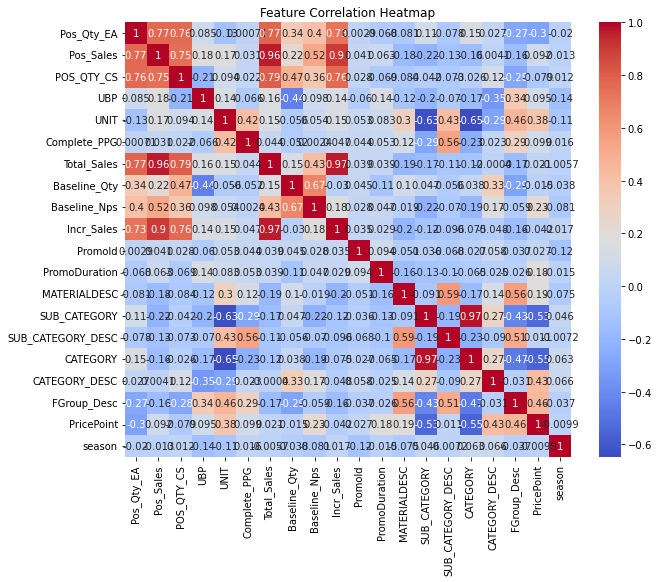

In [28]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [29]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [30]:
# Separate features and target
X = df.drop('Pos_Qty_EA', axis=1)  # Features
y = df['Pos_Qty_EA']  # Target

#### Feature selection using L1 Regularization (Lasso)


- `lasso_selector = SelectFromModel(Lasso(alpha=0.01))`: This creates a feature selector using Lasso regression with a specified regularization parameter `alpha=0.01`.


- `X_lasso = lasso_selector.fit_transform(X, y)`: This applies the Lasso feature selector to the feature matrix `X` and the target vector `y`, and returns the transformed feature matrix X_lasso with selected features.


- `lasso_features = X.columns[lasso_selector.get_support()]`: This retrieves the selected features from the original feature matrix `X` based on the Lasso feature selector.

In [31]:
lasso_selector = SelectFromModel(Lasso(alpha=0.01))
X_lasso = lasso_selector.fit_transform(X, y)
lasso_features = X.columns[lasso_selector.get_support()]

In [32]:
print("Lasso Selected Features:")
print(lasso_features)
print("Number of features: ", len(X.columns[lasso_selector.get_support()]))

Lasso Selected Features:
Index(['Pos_Sales', 'POS_QTY_CS', 'UBP', 'UNIT', 'Complete_PPG', 'Total_Sales',
       'Baseline_Qty', 'Baseline_Nps', 'Incr_Sales', 'PromoDuration',
       'MATERIALDESC', 'SUB_CATEGORY', 'SUB_CATEGORY_DESC', 'CATEGORY',
       'CATEGORY_DESC', 'FGroup_Desc', 'PricePoint', 'season'],
      dtype='object')
Number of features:  18


#### Feature selection using Tree-based feature importance

- `rf = RandomForestRegressor()`: This creates a Random Forest Regressor model.
- `rf.fit(X, y)`: This trains the Random Forest Regressor on the feature matrix X and the target vector y.
- `feature_importances = rf.feature_importances_`: This retrieves the feature importances from the trained Random Forest Regressor.
- `feature_indices = np.argsort(feature_importances)[::-1]`: This sorts the feature importances in descending order and retrieves the corresponding indices.
- `top_k = 5`: This sets the desired number of top features to be selected.
- `X_tree_based = X.iloc[:, feature_indices[:top_k]]`: This selects the top `top_k` features from the original feature matrix X based on the feature importances.

In [33]:
rf = RandomForestRegressor()
rf.fit(X, y)
feature_importances = rf.feature_importances_
feature_indices = np.argsort(feature_importances)[::-1]
top_k = 5
X_tree_based = X.iloc[:, feature_indices[:top_k]]
tree_features = X_tree_based.columns

In [34]:
print("\nTree-based Selected Features:")
print(tree_features)
print("Number of features: ", len(X_tree_based.columns))


Tree-based Selected Features:
Index(['POS_QTY_CS', 'PricePoint', 'Total_Sales', 'Pos_Sales', 'Incr_Sales'], dtype='object')
Number of features:  5


#### Feature selection using Recursive Feature Addition (RFA)

- `estimator = RandomForestRegressor()`: This creates a Random Forest Regressor model.
- `rfa_selector = RFE(estimator=estimator, n_features_to_select=5): This creates a feature selector using Recursive Feature Addition (RFA) with the Random Forest Regressor as the estimator and specifying the number of features to select as 5.
- `X_rfa = rfa_selector.fit_transform(X, y)`: This applies the RFA feature selector to the feature matrix `X` and the target vector `y`, and returns the transformed feature matrix `X_rfa` with selected features.
- `rfa_features = X.columns[rfa_selector.support_]`: This retrieves the selected features from the original feature matrix `X` based on the RFA feature selector.

In [35]:
estimator = RandomForestRegressor()
rfa_selector = RFE(estimator=estimator, n_features_to_select=5)
X_rfa = rfa_selector.fit_transform(X, y)
rfa_features = X.columns[rfa_selector.support_]

In [36]:
print("\nRFA Selected Features:")
print(rfa_features)
print("Number of features: ", len(X.columns[rfa_selector.support_]))


RFA Selected Features:
Index(['Pos_Sales', 'POS_QTY_CS', 'Total_Sales', 'SUB_CATEGORY', 'PricePoint'], dtype='object')
Number of features:  5


#### DIsplay the datafram with Selected Features

In [37]:
# dataframe with features selected by L1 Regularization (Lasso)
lasso_df = df[lasso_features]

# add target column
lasso_df['Pos_Qty_EA'] = df['Pos_Qty_EA']

# show df
lasso_df.head()

,Pos_Sales,POS_QTY_CS,UBP,UNIT,Complete_PPG,Total_Sales,Baseline_Qty,Baseline_Nps,Incr_Sales,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc,PricePoint,season,Pos_Qty_EA
0,186.15,8.625,23.44,1,19,202.17,14,328.16,-125.99,35,28,13,16,6,3,18,2.697826,2,69
1,161.86,7.500,23.44,1,19,175.80,14,328.16,-152.36,35,28,13,16,6,3,18,2.697667,2,60
2,271.56,12.625,23.44,1,19,295.93,14,328.16,-32.23,35,28,13,16,6,3,18,2.688713,2,101
3,188.51,8.750,23.44,1,19,205.10,14,328.16,-123.06,35,28,13,16,6,3,18,2.693000,2,70
4,215.82,10.000,23.44,1,19,234.40,14,328.16,-93.76,35,28,13,16,6,3,18,2.697750,2,80


In [38]:
# dataframe with features selected by Tree-based feature importance
tree_df = df[tree_features]

# add target column
tree_df['Pos_Qty_EA'] = df['Pos_Qty_EA']

# show df
tree_df.head()

,POS_QTY_CS,PricePoint,Total_Sales,Pos_Sales,Incr_Sales,Pos_Qty_EA
0,8.625,2.697826,202.17,186.15,-125.99,69
1,7.500,2.697667,175.80,161.86,-152.36,60
2,12.625,2.688713,295.93,271.56,-32.23,101
3,8.750,2.693000,205.10,188.51,-123.06,70
4,10.000,2.697750,234.40,215.82,-93.76,80


In [39]:
# dataframe with features selected by Tree-based feature importance
rfa_df = df[rfa_features]

# add target column
rfa_df['Pos_Qty_EA'] = df['Pos_Qty_EA']

# show df
rfa_df.head()

,Pos_Sales,POS_QTY_CS,Total_Sales,SUB_CATEGORY,PricePoint,Pos_Qty_EA
0,186.15,8.625,202.17,13,2.697826,69
1,161.86,7.500,175.80,13,2.697667,60
2,271.56,12.625,295.93,13,2.688713,101
3,188.51,8.750,205.10,13,2.693000,70
4,215.82,10.000,234.40,13,2.697750,80


### 6.2 Feature Selection

In this case, I utilize a random forest model to evaluate three different dataframes containing selected features from distinct feature selection methods. The objective is to identify the most optimal set of features.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score


def decision_tree_func(df):
    # Separate features and target
    X = df.drop('Pos_Qty_EA', axis=1)  # Features
    y = df['Pos_Qty_EA']  # Target

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create a decision tree regressor
    tree = DecisionTreeRegressor()

    # Fit the model on the training data
    tree.fit(X_train, y_train)

    # Predict on the test data
    y_pred = tree.predict(X_test)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the predicted values, MSE, and MAE
    print("Accuracy:", accuracy)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)

    return accuracy


In [41]:
# lasso dataframe
lasso_accuracy = decision_tree_func(lasso_df)

Accuracy: 0.7615176151761518
Mean Squared Error: 160.3839205058717
Mean Absolute Error: 2.163504968383017


In [42]:
# tree dataframe
tree_accuracy = decision_tree_func(tree_df)

Accuracy: 0.7741644083107497
Mean Squared Error: 240.85365853658536
Mean Absolute Error: 1.990063233965673


In [43]:
# rfa dataframe
rfa_accuracy = decision_tree_func(rfa_df)

Accuracy: 0.7913279132791328
Mean Squared Error: 120.86359530261969
Mean Absolute Error: 1.5790424570912376


In [44]:
finalleaderboard = {
    'Lasso Dataframe': lasso_accuracy,
    'Tree Dataframe': tree_accuracy,
    'RFA Dataframe': rfa_accuracy
}

finalleaderboard = pd.DataFrame.from_dict(finalleaderboard, orient='index', columns=['Accuracy'])
finalleaderboard = finalleaderboard.sort_values('Accuracy', ascending=False)
finalleaderboard

,Accuracy
RFA Dataframe,0.791328
Tree Dataframe,0.774164
Lasso Dataframe,0.761518


In [45]:
print("According to the result, " + str(list(rfa_features)) + " \nwill be chosen as features.")

According to the result, ['Pos_Sales', 'POS_QTY_CS', 'Total_Sales', 'SUB_CATEGORY', 'PricePoint'] 
will be chosen as features.


In [46]:
rfa_df.head()

,Pos_Sales,POS_QTY_CS,Total_Sales,SUB_CATEGORY,PricePoint,Pos_Qty_EA
0,186.15,8.625,202.17,13,2.697826,69
1,161.86,7.500,175.80,13,2.697667,60
2,271.56,12.625,295.93,13,2.688713,101
3,188.51,8.750,205.10,13,2.693000,70
4,215.82,10.000,234.40,13,2.697750,80


## 7. Model Performance Improvement

In this section, we will employ various techniques to enhance the model's performance, including corss-validation, standarlization and hyperparameter tunning.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Separate features and target
X = df.drop('Pos_Qty_EA', axis=1)  # Features
y = df['Pos_Qty_EA']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the decision tree model
tree = DecisionTreeRegressor()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)  # Accuracy

# Create a dataframe to store model performance
performance_df = pd.DataFrame(columns=['Model', 'Best Hyperparameters', 'MSE', 'Accuracy'])

# Add the performance of the best model to the dataframe
performance_df = performance_df.append({
    'Model': 'Decision Tree',
    'Best Hyperparameters': best_params,
    'MSE': mse,
    'Accuracy': accuracy
}, ignore_index=True)


# Print the performance dataframe
performance_df

,Model,Best Hyperparameters,MSE,Accuracy
0,Decision Tree,"{'max_depth': None, 'min_samples_leaf': 3, 'mi...",63.741022,0.995232


In [49]:
best_params

{'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5}

Here we find the model with best hyperparameters of {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
withe accuracy of 0.995435 and MSE of 61.02168.